## Random Walks Continued --> Ideal Gas Law and Probability

In [1]:
import random
class Location(object):
    def __init__(self, x, y):
        """x and y are numbers"""
        self.x = x
        self.y = y

    def move(self, delta_x, delta_y):
        """deltaX and deltaY are numbers"""
        return Location(self.x + delta_x,
                        self.y + delta_y)
    def get_x(self):
        return self.x

    def get_y(self):
        return self.y

    def dist_from(self, other):
        x_dist = self.x - other.get_x()
        y_dist = self.y - other.get_y()
        return (x_dist**2 + y_dist**2)**0.5

    def __str__(self):
        return '<' + str(self.x) + ', ' + str(self.y) + '>'

class Field(object):
    def __init__(self):
        self.drunks = {}

    def add_drunk(self, drunk, loc):
        if drunk in self.drunks:
            raise ValueError('Duplicate drunk')
        else:
            self.drunks[drunk] = loc

    def get_loc(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        return self.drunks[drunk]

    def move_drunk(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        x_dist, y_dist = drunk.take_step()
        # use move method of Location to set new location
        self.drunks[drunk] =\
            self.drunks[drunk].move(x_dist, y_dist)

class Drunk(object):
    def __init__(self, name = None):
        """Assumes name is a str"""
        self.name = name

    def __str__(self):
        if self != None:
            return self.name
        return 'Anonymous'

class Usual_drunk(Drunk):
    def take_step(self):
        step_choices = [(0,1), (0,-1),
                       (1, 0), (-1, 0)]
        return random.choice(step_choices)
class Odd_field(Field):
    def __init__(self, num_holes = 1000,
                 x_range = 100, y_range = 100):
        Field.__init__(self)
        self.wormholes = {}
        for w in range(num_holes):
            x = random.randint(-x_range, x_range)
            y = random.randint(-y_range, y_range)
            new_x = random.randint(-x_range, x_range)
            new_y = random.randint(-y_range, y_range)
            new_loc = Location(new_x, new_y)
            self.wormholes[(x, y)] = new_loc

    def move_drunk(self, drunk):
        Field.move_drunk(self, drunk)
        x = self.drunks[drunk].get_x()
        y = self.drunks[drunk].get_y()
        if (x, y) in self.wormholes:
            self.drunks[drunk] = self.wormholes[(x, y)]

**Other Fields**

- Odd field (field with wormholes)

The world is not just a collection of drunks

- Have used a simple, two-dimensional world to explore random walk of drunks
- Can imagine how could simulate a field with multiple drunks at the same time
- Imagine extending for interactions between drunks or a wall
- Now imagine replacing drunks with molecules in a gas
- Brownian motion simulation

pV = nRT
P - pressure
V - volume
n - number of molecules
R - a constant
T - temperature

We will model this in two dimensions
1. V corresponds to size of field
2. n corresponds to number of drunks (particles)
3. T corresponds to walk length (velocity of particles)

**Simple Trial**
- Have included some basic code to explore this in 2D
- Changes:

--> Field includes a limit on x and y dimensions (rigid container)

--> `move` method checks (simplified with no bouncing):
1. If would move beyond limit, don't move
2. If move would take particle too close to any other, don't move

--> Start particles at random locations
1. Measure final distance from each start rather than origin

--> Record average final distance for all particles in a trial

***Complexity***
- Two implementations of Field (think of them as 1D containers)
- One will be optimized for a small number of particles, the other for a larger number

Implementation 1 
1. Associate location with each particle
- Space linear in # of particles
2. At each step, for each particle, check for collision with each other particle
- Time of each step quadratic in # of particles

Implementation 2
1. For each 1x1 cell of field, keep track of location of any particle in that cell (at most one)
- Space linear in size of field (x_len * y_len)
- Initialization of field linear in size of field
2. At each step, for each particle, check if any of the cells neighboring the destination. If so, see if particle in that cell is too close
- Time of each step constant in number of particles

***Common algorithmic technique***: Use a fast way to get in neighborhood of a solution, then a slower algorithm to explore the neighborhood



In [ ]:
class Field_multi(object):
    """ Optimized for large fields with small number of particles """
    def __init__(self, x_lim, y_lim):
        self.drunks = {}
        self.x_lim = x_lim
        self.y_lim = y_lim
        self.wall_hits, self.collisions = 0,0

class Field_multi_opt_particles(Field_multi):
    """ Optimized for large number of particles """
    def __init__(self, x_lim, y_lim):
        super().__init__(x_lim, y_lim)
        #Used so collisions can be detected in constant time
        self.drunks_by_loc = {(x, y): [] for x in range(-(x_lim + 1), x_lim+2) for y in range(-(y_lim + 1), y_lim + 2)}


**Complexity**

Implementation 1
- Independent of size of field

number of particles^2 * total number of steps

Implementation 2
- Independent of number of particles

2 * x_lim * y_lim * number_of_trials + total number of steps

<--        Initialize field      -->  _________________           <--  Simulate walk   -->

***Some simple experiments***

Questions to explore:
- How does average over a set of trials of average final distance for a set of particles change
- - As the size, # of particles, and # of steps change


### Vary Volume

In [ ]:

class Field_multi(object):
    """ Optimized for large fields with small number of particles"""
    def __init__(self, x_lim, y_lim):
        self.drunks = {}
        self.x_lim = x_lim
        self.y_lim = y_lim
        self.wall_hits, self.collisions = 0, 0

    def add_drunk(self, drunk, loc):
        if drunk in self.drunks:
            raise ValueError('Duplicate drunk')
        else:
            self.drunks[drunk] = loc

    def get_loc(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        return self.drunks[drunk]

    def get_lims(self):
        return (self.x_lim, self.y_lim)

    def get_wall_hits(self):
        return self.wall_hits

    def get_collisions(self):
        return self.collisions

    def move_drunk(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        # use move method of Location to get new location within field
        # respect edges of field
        x_dist, y_dist = drunk.take_step()
        new_loc = self.drunks[drunk].move(x_dist, y_dist)
        too_close = False

        for d in self.drunks:
            # check that not too close to other drunks
            if d != drunk and self.drunks[d].dist_from(new_loc) < 1.0:
                too_close = True # So particle will not move
                self.collisions += 1
                break
        # Check if would hit wall
        if too_close:
            pass
        elif new_loc.get_x() < -self.x_lim or new_loc.get_x() > self.x_lim:
            self.wall_hits += 1
        elif new_loc.get_y() < -self.y_lim or new_loc.get_y() > self.y_lim:
            self.wall_hits += 1
        else:
            # if any of above hold, don't move; otherwise move
            self.drunks[drunk] = new_loc

class Field_multi_opt_particles(Field_multi):
    """ Optimized for large number of particles"""
    def __init__(self, x_lim, y_lim):
        super().__init__(x_lim, y_lim)
        # Used so that collisions can be detected in constant time
        self.drunks_by_loc = {(x, y): []
                          for x in range(-(x_lim + 1), x_lim + 2)
                          for y in range(-(y_lim + 1), y_lim + 2)}

    def add_drunk(self, drunk, loc):
        if drunk in self.drunks:
            raise ValueError('Duplicate drunk')
        else:
            self.drunks[drunk] = loc
            self.drunks_by_loc[(loc.get_x(), loc.get_y())].append(drunk)

    def move_drunk(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        old_x = self.drunks[drunk].get_x()
        old_y = self.drunks[drunk].get_y()
        # use move method of Location to get new location within field
        # respect edges of field
        x_dist, y_dist = drunk.take_step()
        new_loc = self.drunks[drunk].move(x_dist, y_dist)
        too_close = False
        x_val, y_val = new_loc.get_x(), new_loc.get_y()
        # Limit area to search for collisions
        # Find relevant columns
        relevant_cols = [x_val]
        if x_val < self.x_lim: # not at right edge
            relevant_cols.append(x_val + 1)
        if x_val > -self.x_lim: # not at left edge
            relevant_cols.append(x_val - 1)
        # find relevant cells by finding relevant rows and adding each x from
        # relevant columns
        relevant_cells = [(x, y_val) for x in relevant_cols]
        if y_val < self.y_lim: # not at top edge
            for x_val in relevant_cols:
                relevant_cells.append((x_val, y_val))
        if y_val > -self.y_lim: # not at bottom edge
            for x_val in relevant_cols:
                relevant_cells.append((x_val, y_val-1))
        possible_neighbors = []
        for cell in relevant_cells:
            for d in self.drunks_by_loc[cell]:
                possible_neighbors.append(d)
        for d in possible_neighbors:
            # check that not too close to other drunks
            if d != drunk and self.drunks[d].dist_from(new_loc) < 1.0:
                too_close = True
                self.collisions += 1
                break
        # Check if would hit wall
        if too_close:
            pass
        elif new_loc.get_x() < - self.x_lim or new_loc.get_x() > self.x_lim:
            self.wall_hits += 1
        elif new_loc.get_y() < - self.y_lim or new_loc.get_y() > self.y_lim:
            self.wall_hits += 1
        else:
            # if any of above hold, don't move; otherwise move
            self.drunks[drunk] = new_loc
            self.drunks_by_loc[(old_x, old_y)].remove(drunk)
            self.drunks_by_loc[(new_loc.get_x(),
                                new_loc.get_y())].append(drunk)

def walk_multi(f, ds, num_steps, starts):
    """Assumes: f a Field, ds a dict of Drunks in f,
          num_steps an int >= 0,
          starts a dict of starting locations
       Moves each d in ds num_steps times, and returns the
       average distance between the
       final location and the location at the start of the walk."""
    for s in range(num_steps):
        for d in ds:
            f.move_drunk(d)
    dists = []
    for d in ds:
        start = starts[d]
        dist = start.dist_from(f.get_loc(d))
        dists.append(dist)
    return dists

def sim_walks_multi(num_steps, num_trials, d_class, num_drunks,
                    boundaries, opt_space = False, verbose = False):
    """Assumes num_steps an int >= 0, num_trials an int > 0,
         d_class a subclass of Drunk, num_drunks an int,
         boundaries an int
       Simulates num_trials walks of num_steps steps each.
       Returns a list of the final mean, max, and min distances
         for each trial"""
    starts = {}
    range_of_choices = [i for i in range(-boundaries, boundaries+1)]
    mean_dists, max_dists, min_dists, wall_hits, cols = [], [], [], [], []
    for t in range(num_trials):
        if opt_space:
            f = Field_multi(boundaries, boundaries)
        else:
            f = Field_multi_opt_particles(boundaries, boundaries)
        for i in range(num_drunks):
            Homer = d_class('Homer' + str(i))
            start = Location(random.choice(range_of_choices),
                             random.choice(range_of_choices))
            f.add_drunk(Homer, start)
            starts[Homer] = start
        distances = walk_multi(f, f.drunks, num_steps, starts)
        mean_dists.append(sum(distances)/len(distances))
        max_dists.append(max(distances))
        min_dists.append(min(distances))
        wall_hits.append(f.get_wall_hits())
        cols.append(f.get_collisions())
        if verbose:
            print(f'Mean distance for trial {t} = {mean_dists[-1]}')
    return mean_dists, max_dists, min_dists, wall_hits, cols

def drunk_test_multi(walk_lengths, num_trials, d_class, num_particles,
                     boundaries, opt_space = False, verbose = False):
    """Assumes walk_lengths a sequence of ints >= 0
         num_trials an int > 0, d_class a subclass of Drunk
       For each number of steps in walk_lengths, runs
       sim_walks with num_trials walks and prints results"""
    for l in walk_lengths:
        for num in num_particles:
            for d in boundaries:
                random.seed(1)
                print(f'particles = {num}, size = {d:,}, steps = {l:,}')
                mean_dists, max_dists, min_dists, wall_hits, cols =\
                            sim_walks_multi(l, num_trials, d_class, num, d,
                                            verbose = verbose,
                                            opt_space = opt_space)
                max_d = round(max(max_dists))
                min_d = round(min(min_dists))
                mean_d = sum(mean_dists)/len(mean_dists)
                mean_wh = sum(wall_hits)/len(wall_hits)
                mean_col = sum(cols)/len(cols)
                print(f' Distance: Max = {max_d}, Min = {min_d},',
                      f'Mean = {mean_d:.2f}')
                print(f' Mean wall hits = {round(mean_wh):,}')
                if mean_col != 0:
                    print(f' Mean collisions = {round(mean_col):,}')

Particle = Usual_drunk

# Vary field size
num_particles = (1,)
sizes = (10, 20, 50, 100, 1000, 10000)
lengths = (50000,)
num_trials = 50
drunk_test_multi(lengths, num_trials, Particle, num_particles, sizes,
                  opt_space = True)

particles = 1, size = 10, steps = 50,000
 Distance: Max = 24, Min = 1, Mean = 11.58
 Mean wall hits = 2,403
particles = 1, size = 20, steps = 50,000
 Distance: Max = 40, Min = 2, Mean = 21.82
 Mean wall hits = 1,219
particles = 1, size = 50, steps = 50,000
 Distance: Max = 97, Min = 6, Mean = 51.04
 Mean wall hits = 462
particles = 1, size = 100, steps = 50,000
 Distance: Max = 197, Min = 12, Mean = 93.88
 Mean wall hits = 220
particles = 1, size = 1,000, steps = 50,000
 Distance: Max = 423, Min = 19, Mean = 173.54
 Mean wall hits = 19
particles = 1, size = 10,000, steps = 50,000
 Distance: Max = 433, Min = 10, Mean = 184.82
 Mean wall hits = 0


Diffusion is slow

As size grows, distance grows up to a point

You can see mean wall hits decrease and size increases

Increases to mean decrease

Wall hits correspond to pressure

As area (Volume) grows, pressure decreases

### Vary Walk Lengths

In [5]:
num_particles = (1,)
sizes = (50,)
lengths = (100, 1000, 10000, 100000)
num_trials = 50
drunk_test_multi(lengths, num_trials, Particle, num_particles, sizes,
                  opt_space = True)

particles = 1, size = 50, steps = 100
 Distance: Max = 23, Min = 1, Mean = 9.06
 Mean wall hits = 1
particles = 1, size = 50, steps = 1,000
 Distance: Max = 65, Min = 3, Mean = 25.70
 Mean wall hits = 13
particles = 1, size = 50, steps = 10,000
 Distance: Max = 112, Min = 1, Mean = 53.10
 Mean wall hits = 84
particles = 1, size = 50, steps = 100,000
 Distance: Max = 105, Min = 17, Mean = 55.00
 Mean wall hits = 961


Number of steps corresponds to velocity which increases with temperature

As temperature rises, mean and max distance increases, and pressure increases



### Vary Number of Particles

In [6]:
sizes = (16,)
lengths = (1000,)
num_particles = [2**i for i in range(1, 11, 3)]
for n in num_particles:
    num_trials = 10
    drunk_test_multi(lengths, num_trials, Particle, (n,),
                      sizes, opt_space = False, verbose = False)

particles = 2, size = 16, steps = 1,000
 Distance: Max = 32, Min = 4, Mean = 16.65
 Mean wall hits = 58
 Mean collisions = 3
particles = 16, size = 16, steps = 1,000
 Distance: Max = 37, Min = 1, Mean = 16.18
 Mean wall hits = 522
 Mean collisions = 206
particles = 128, size = 16, steps = 1,000
 Distance: Max = 39, Min = 1, Mean = 15.84
 Mean wall hits = 3,944
 Mean collisions = 14,572
particles = 1024, size = 16, steps = 1,000
 Distance: Max = 25, Min = 0, Mean = 5.09
 Mean wall hits = 31,088
 Mean collisions = 930,025


First couple have pretty much the same 
but when we get a bunch of particles there are a lot more collisions which means a lot less travel

Predicted collions = 983,075,276


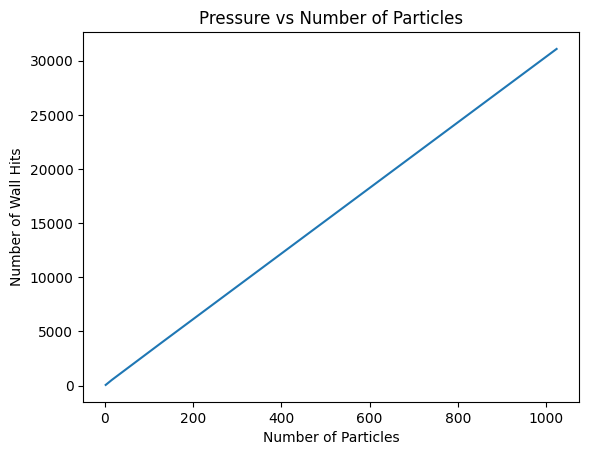

In [9]:
# # Plot results from simulation varying number of particles
import matplotlib.pyplot as plt
import numpy as np
n = [2,16,128,1024]
hits = [58,522,3944,31088]
cols = [3,206,14572,930025]
plt.plot(n, hits)
plt.title('Pressure vs Number of Particles')
plt.xlabel('Number of Particles')
plt.ylabel('Number of Wall Hits')

model = np.polyfit(n, cols, 1)
print(f'Predicted collions = {int(np.polyval(model, 2**20)):,}')

--> As predicted by ideal gas law!

**Probability**
- Count the total universe of events and see the number of events that have the property of interest
- Probabilities are 0 -> 1 . . . 0 if impossible, 1 is guranteed
- Probability of occurring is p, not ocurring is 1-p
- Independence


***Summary***
- Random walks allow us to model many physical and social phenomena
- Looked at classic drunkards walk
- Looked at a simple particle simulation

1. Start by defining classes
- Good use of sub-classing
2. Built function corresponding to
- One trial, multiple trials, result reporting
3. Got a simple version working first --> sanity check
4. Made series of incremental changes to simulation so that we could investigate different questions
5. By changing porperties of objects can explore a range of behaviors

Given a universe U of all possible events

P(A) = (number events in A) / (number of events in U)

P(A and B) = P(A)*P(B) if A and B are independent

Flipping a heads then rolling a 5 on a die?
P(head) = 1/2
P(5) = 1/6

P(head and 5) = 1/12

P(A or B) = 1 - P(!A) * P(!B)
P(head or 5) = (7/12)



**Independent vs Dependent Probabilities**
- Deal two cards at random from a standard deck of 52 cards
- What is the probability that the first card is a king and the second is a king?

With replacement
- 4/52 * 4/52
- Because these are independents

Without replacements
- 4/52 * 3/51
- These are not independent events (second deal is conditional on the outcome of the first deal)
